<a href="https://colab.research.google.com/github/MarinaWolters/Coding-Tracker/blob/master/HandsOn8_Classification_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification and Regression

We will cover the application of classification and regression in this notebook. 

Specifically we will:
- apply Decision Trees to a dataset that has both categorical and numerical features
- explore the impact of parameters (max_depth, and max_features) on the Decision Tree model
- evaluate the performance of Random Forests on the same dataset
- switch to another dataset with continuous outcomes to explore the application of linear and logistic regression

**Install required libraries (if missing)**

In [ ]:
#!pip install pandas
#!pip install sklearn
#!pip install seaborn
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import the required libraries**

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import random
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
#Accuracy classification score
from sklearn.metrics import accuracy_score

#Disable warnings (Not a good idea in general, but helps clean output for today)
import warnings
warnings.filterwarnings('ignore')

# Decision Trees

The first [dataset](https://www.kaggle.com/datasets/deepu1109/star-dataset) consists of several attributes of 240 stars that belong to 6 categories/classes:

The features are:
* Absolute Temperature (in K)
* Relative Luminosity (L/Lo)
* Relative Radius (R/Ro)
* Absolute Magnitude (A_M)
* Star Color (White, Red, Blue, Yellow, Yellow-orange etc)
* Spectral Class (O, B, A, F, G, K, M)
* Star Type **(Brown Dwarf (0), Red Dwarf (1), White Dwarf (2), Main Sequence (3), SuperGiants (4), HyperGiants (5))**


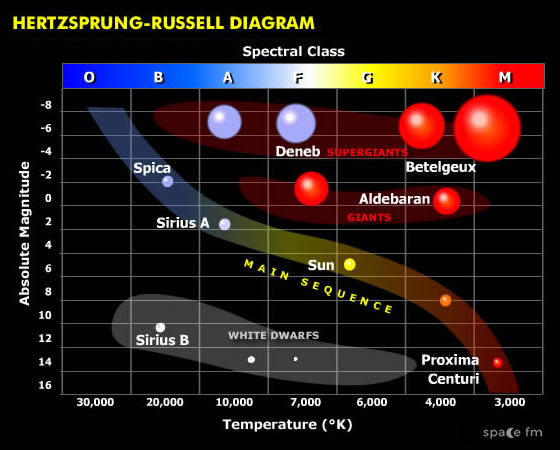


In [ ]:
# [TODO] Load the data
stars_url = 'https://raw.githubusercontent.com/chandrasg/CIS5450_Summer22/main/Stars.csv'
stars_df = pd.read_csv(stars_url)
stars_df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


What are the first steps after we load the dataset?

In [ ]:
# [TODO] Explore the distribution of class labels 
stars_df.Type.value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

In [ ]:
#[TODO] Explore values of features
stars_df.Spectral_Class.unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [ ]:
# Is there something odd about the Color attribute? 

stars_df.Color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [ ]:
# Recode Features to be Consistent?
stars_df.loc[stars_df.Color == 'white', 'Color'] = 'White'
stars_df.loc[stars_df.Color == 'yellowish', 'Color'] = 'Yellowish'
stars_df.loc[stars_df.Color == 'Blue white', 'Color'] = 'Blue White'

While certain DT algorithms (CART) support categorical variables, SKLearn does not support them. So how do we deal with categorical features?

In [ ]:
# [TODO] Convert to one-hot encoding
stars_df = pd.get_dummies(stars_df, columns = ['Color', 'Spectral_Class'])
stars_df

,Temperature,L,R,A_M,Type,Color_Blue,Color_Blue White,Color_Blue-White,Color_Blue-white,Color_Orange,...,Color_Yellowish,Color_Yellowish White,Color_yellow-white,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# [TODO] Splitting data into 50% training and 50% testing data
y= stars_df[['Type']]
X= stars_df.drop(['Type'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

Training the Model with Entropy as the criterion. What is the other criterion we learnt about in the lecture? 

In [ ]:
# [TODO] Train the model on training data and apply it on testing data to then calculate the accuracy_score
clf = DecisionTreeClassifier(criterion='entropy')
# fit on the training dat
clf.fit(X_train, y_train)
# make predications
predictions = clf.predict(X_test)
# Measuring the accuracy of our model
print(accuracy_score(y_test, predictions))

1.0


Let's now visualize the tree. Note the entropy of nodes at different levels. Do we expect them to decrease with each level?

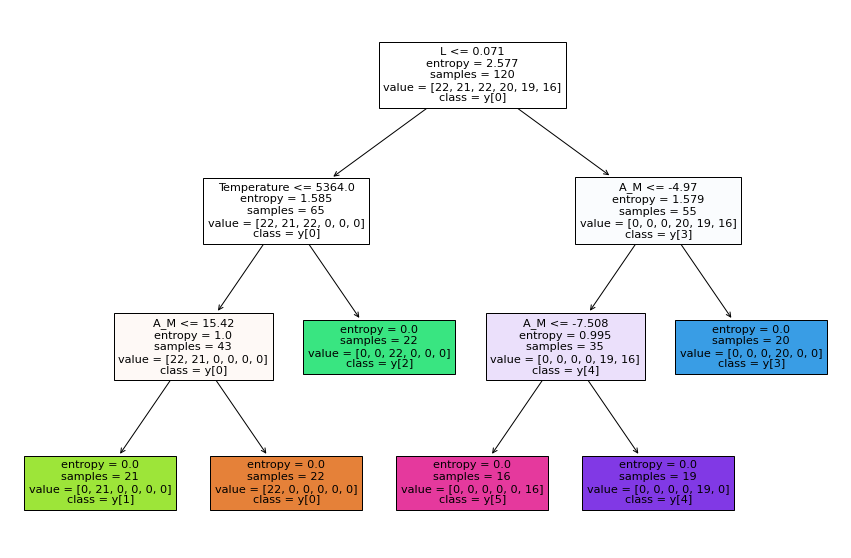

In [ ]:
# plot the tree
fig = plt.figure(figsize=(15,10))
_ = plot_tree(clf, 
              feature_names=stars_df.columns.tolist(),  
              class_names=True,
              filled=True)


DecisionTree with default parameters uses all the features when evaluating the best split at each level. How does varying this parameter impact the model performance?

In [ ]:
# [TODO] Iterate over the different max_feat options, train a decision tree model and print accuracy for each run
max_feat = [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]

'''
The number of features to consider when looking for the best split:
If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.
'''
for n_feat in max_feat:
  clf = DecisionTreeClassifier(criterion='entropy', max_features=n_feat, max_depth = 3)
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_test)
  # Measuring the accuracy of our model
  print('Max Features:', n_feat, ' and Accuracy: ', accuracy_score(y_test,predictions))

Max Features: None  and Accuracy:  1.0
Max Features: sqrt  and Accuracy:  0.65
Max Features: log2  and Accuracy:  0.5583333333333333
Max Features: 0.2  and Accuracy:  0.7166666666666667
Max Features: 0.4  and Accuracy:  0.975
Max Features: 0.6  and Accuracy:  0.9
Max Features: 0.8  and Accuracy:  1.0


What is the implication of using a lower value for max_features when training very large datasets?

The default parameters of the DT gave us a tree with depth = 3. What is the potential limitation of having a tree with large depth? 

Let's look at the impact of varying this parameter. 

In [ ]:
# [TODO] Fill in the blanks to print accuracy for each max_depth value
for d in range(1, 4):
  clf = DecisionTreeClassifier(criterion='entropy', max_depth = d)
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_test)

  # Measuring the accuracy of our model
  print('Max Depth:', d, ' and Accuracy: ', accuracy_score(y_test,predictions))

Max Depth: 1  and Accuracy:  0.31666666666666665
Max Depth: 2  and Accuracy:  0.6416666666666667
Max Depth: 3  and Accuracy:  1.0


Now, let's try an ensemble model (RandomForest) with max_depth=2. 

In [ ]:
# RandomForest

clf = RandomForestClassifier(max_depth=3, random_state = 0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
# [TODO] Measuring the accuracy of our model
print('Max Depth:', 2, ' and Accuracy: ', accuracy_score(y_test,predictions))

Max Depth: 2  and Accuracy:  0.9583333333333334


# Linear Regression

Let's switch to a different dataset that documents life satisfaction of countries measured by surveying a large number of individuals. The dataset used in this notebook is a subset of that used in [The World Happiness Report](https://https://worldhappiness.report/ed/2018/?fbclid=IwAR37naSOvjBPwztHvARL7I3J4F60H7yD2-9DUuO98Xrb1HJsBsk2U0_EdQs#appendices-and-data). 

The main attributes we will look at today are:
- Life Satisfaction measured by Cantrill Ladder: “Please imagine a ladder, with steps numbered from
0 at the bottom to 10 at the top. The top of the ladder represents the best
possible life for you and the bottom of the ladder represents the worst possible
life for you. On which step of the ladder would you say you personally feel you
stand at this time?”
- GDP per capita
- Social support: “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?"
- Healthy life expectancy
- Freedom to make life choices: “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
- Generosity: “Have you donated money to a charity in the past month?” 
- Perceptions of corruption
- Positive affect: happiness, laugh and enjoyment
- Negative affect: worry, sadness and anger
- Confidence in national government
- Democratic Quality: Voice and Accountability, Political Stability and Absence of Violence
- Delivery Quality: Government Effectiveness, Regulatory Quality, Rule of Law, Control of Corruption 

See the [report appendix](https://https://s3.amazonaws.com/happiness-report/2018/Appendix1ofChapter2.pdf) for full list. 

In [ ]:
# World Happiness Report data
whr_url = 'https://raw.githubusercontent.com/chandrasg/CIS5450_Summer22/main/WHR2018Chapter2OnlineData.xls'
whr_df = pd.read_excel(whr_url,  sheet_name=0)

# This is a multi-year dataset. Let's look at a subset of attributes aggregates from 2015-2017 for the purposes of this notebook 
whr_df_agg = whr_df.loc[whr_df.year>=2015].groupby('country').mean().reset_index()

whr_df_agg

#Select a subset of columns used in analyses for this notebook
cols = ['country','Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality']

whr_df_agg = whr_df_agg[cols]

whr_df_agg

,country,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,Afghanistan,3.621580,7.462587,0.526183,52.016528,0.446168,0.015139,0.876092,0.538285,0.352978,0.282242,-1.881029,-1.362071
1,Albania,4.585767,9.338175,0.638489,68.871808,0.727760,-0.048433,0.887333,0.677618,0.335339,0.455209,0.230042,-0.145853
2,Algeria,5.294883,9.540705,0.777671,65.604351,0.436670,-0.194670,0.699774,0.651245,0.332911,NaN,-1.008262,-0.814304
3,Argentina,6.387894,9.841995,0.905337,67.398514,0.853631,-0.184188,0.847628,0.836625,0.302906,0.367720,0.297319,-0.407026
4,Armenia,4.320509,9.018934,0.709898,64.962730,0.591904,-0.160662,0.895856,0.604252,0.437441,0.200847,-0.501688,-0.176710
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Venezuela,4.804958,9.594635,0.906518,64.674961,0.484880,-0.192932,0.851611,0.777805,0.307195,0.188339,-1.057277,-1.673733
148,Vietnam,5.104620,8.692391,0.862500,66.075638,0.894351,-0.002355,0.799240,0.589231,0.227483,NaN,-0.631841,-0.246580
149,Yemen,3.353955,7.815218,0.744548,54.796664,0.579379,-0.151297,0.829098,0.477321,0.281448,0.259555,-2.162281,-1.508283
150,Zambia,4.374495,8.203179,0.734095,53.267152,0.797799,0.064372,0.793735,0.701779,0.380387,0.681666,-0.008876,-0.425757


Note that several rows have NaNs for a few columns. While there are ways to handle these which we will learn in future weeks, for this notebook, let us drop those rows. 

In [ ]:
# [TODO] Create feature matrix, drop non-numeric values, and create a class label vector
# drop useless column country
X_whr = whr_df_agg.drop(['country'], axis= 1)
# conver to numeric
X_whr = X_whr.apply(pd.to_numeric, errors='coerce')
# drop nan
X_whr = X_whr.dropna()

# y and X
y = X_whr[['Life Ladder']]
X = X_whr.drop(['Life Ladder'], axis = 1)

In [ ]:
X

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,7.462587,0.526183,52.016528,0.446168,0.015139,0.876092,0.538285,0.352978,0.282242,-1.881029,-1.362071
1,9.338175,0.638489,68.871808,0.727760,-0.048433,0.887333,0.677618,0.335339,0.455209,0.230042,-0.145853
3,9.841995,0.905337,67.398514,0.853631,-0.184188,0.847628,0.836625,0.302906,0.367720,0.297319,-0.407026
4,9.018934,0.709898,64.962730,0.591904,-0.160662,0.895856,0.604252,0.437441,0.200847,-0.501688,-0.176710
5,10.700423,0.948051,72.650340,0.918246,0.280585,0.388815,0.786999,0.223695,0.461565,1.126228,1.758197
...,...,...,...,...,...,...,...,...,...,...,...
146,8.705671,0.951819,63.031545,0.982973,0.228788,0.467779,0.840215,0.151043,0.972227,-1.139873,-1.154118
147,9.594635,0.906518,64.674961,0.484880,-0.192932,0.851611,0.777805,0.307195,0.188339,-1.057277,-1.673733
149,7.815218,0.744548,54.796664,0.579379,-0.151297,0.829098,0.477321,0.281448,0.259555,-2.162281,-1.508283
150,8.203179,0.734095,53.267152,0.797799,0.064372,0.793735,0.701779,0.380387,0.681666,-0.008876,-0.425757


In [ ]:
#Scaling and Splitting into training and testing data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state = 5)

In [ ]:
X_train.describe()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.132374,0.101112,0.100200,0.028383,0.007147,-0.043613,0.005798,0.011039,-0.089984,0.087154,0.090775
std,0.925607,0.932930,0.964685,1.059336,1.081480,1.080856,1.052980,1.042025,1.011625,1.012448,1.004038
min,-2.112986,-2.454934,-2.360465,-2.898006,-1.845899,-3.367546,-2.489283,-1.690699,-1.944259,-2.436756,-1.863818
25%,-0.553493,-0.474361,-0.578504,-0.698352,-0.787304,-0.322968,-1.020576,-0.776782,-0.934144,-0.578086,-0.714573
50%,0.271906,0.300728,0.279983,0.370083,-0.237112,0.303589,0.244360,-0.156338,-0.154995,0.048183,-0.198315
75%,0.884662,0.879305,0.916450,0.805374,0.632982,0.678420,0.795984,0.600654,0.573029,0.997199,0.835974
max,1.713448,1.387021,1.672736,1.568543,4.108781,1.116924,1.869427,3.504779,2.529597,1.793539,2.030464


In [ ]:
y_train.describe()

,Life Ladder
count,91.000000
mean,5.468649
std,1.150789
min,3.258502
25%,4.485536
50%,5.482650
75%,6.332968
max,7.632007


In [ ]:
# [TODO] Compare the performance (R2) of linear, lasso, ridge, and ElasticNet regression methods

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# building regression models
rgr_lr = LinearRegression().fit(X_train, y_train)
rgr_lasso = Lasso(alpha=0.5).fit(X_train, y_train)
rgr_ridge = Ridge(alpha=0.5).fit(X_train, y_train)
rgr_elastic = ElasticNet(alpha=0.5).fit(X_train, y_train)

# storing predicted values
predictions_lr = rgr_lr.predict(X_test)
predictions_lasso = rgr_lasso.predict(X_test)
predictions_ridge = rgr_ridge.predict(X_test)
predictions_elastic = rgr_elastic.predict(X_test)

# Measuring the accuracy of our model
print('R^2 (coefficient of determination) for ')
print("Ordinary Linear Regression: ", rgr_lr.score(X_test,y_test))
print("Lasso Regression: ", rgr_lasso.score(X_test,y_test))
print("Ridge Regression: ", rgr_ridge.score(X_test,y_test))
print("Elastic Net Regression: ", rgr_elastic.score(X_test,y_test))

R^2 (coefficient of determination) for 
Ordinary Linear Regression:  0.8301416369972054
Lasso Regression:  0.5312635370300485
Ridge Regression:  0.8316190986096395
Elastic Net Regression:  0.7323157975455807


Let's now look at the coefficients of the different models. 

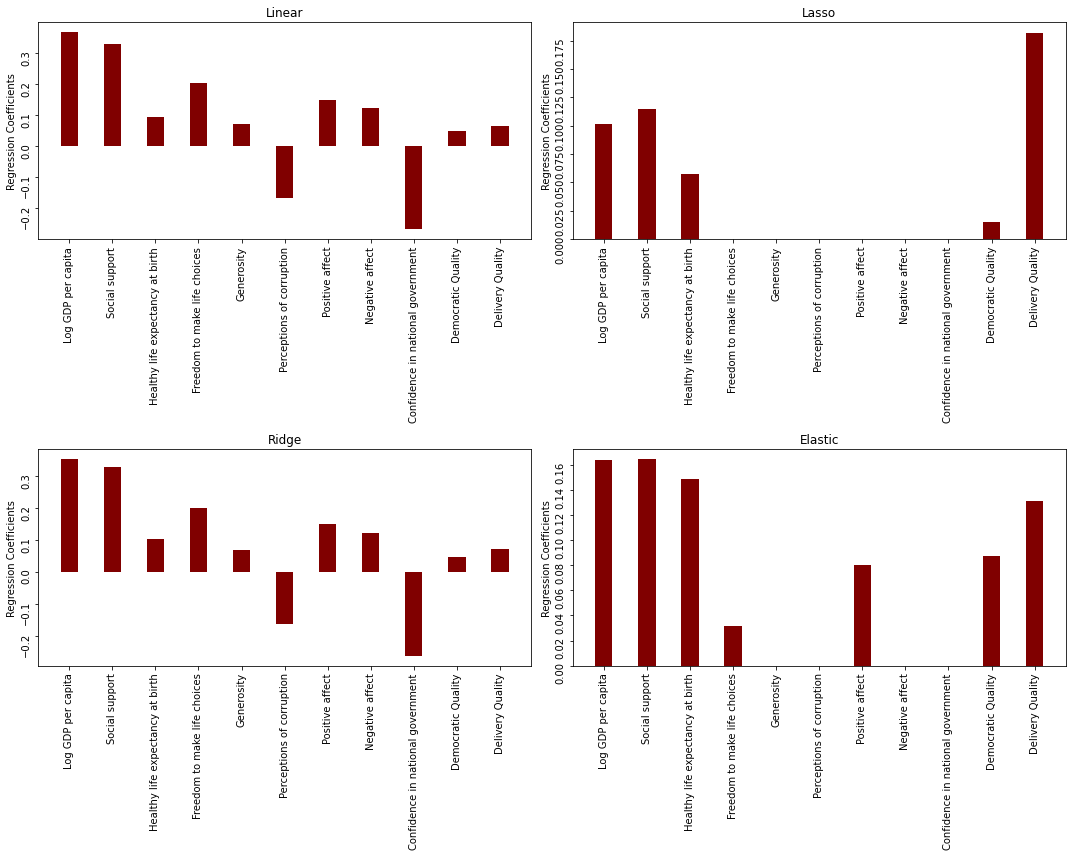

In [ ]:
# plotting regression coefficients for each model

fig, axs = plt.subplots(2, 2, figsize=(15,12))
#fig.suptitle('Regression coefficients for all regression models')

axs[0,0].bar(np.array(X_test.columns), np.array(rgr_lr.coef_[0]), color ='maroon', width = 0.4)
axs[0,0].set_ylabel("Regression Coefficients")
axs[0,0].title.set_text("Linear")
axs[0,0].tick_params(labelrotation=90)

axs[0,1].bar(np.array(X_test.columns), np.array(rgr_lasso.coef_), color ='maroon', width = 0.4)
axs[0,1].set_ylabel("Regression Coefficients")
axs[0,1].title.set_text("Lasso")
axs[0,1].tick_params(labelrotation=90)

axs[1,0].bar(np.array(X_test.columns), np.array(rgr_ridge.coef_[0]), color ='maroon', width = 0.4)
axs[1,0].set_ylabel("Regression Coefficients")
axs[1,0].title.set_text("Ridge")
axs[1,0].tick_params(labelrotation=90)

axs[1,1].bar(np.array(X_test.columns), np.array(rgr_elastic.coef_), color ='maroon', width = 0.4)
axs[1,1].set_ylabel("Regression Coefficients")
axs[1,1].title.set_text("Elastic")
axs[1,1].tick_params(labelrotation=90)

fig.tight_layout()
plt.show()

What can we infer from these coefficients? 

A inter-correlation heatmap could also help us understand the distribution better. 

<Axes: >

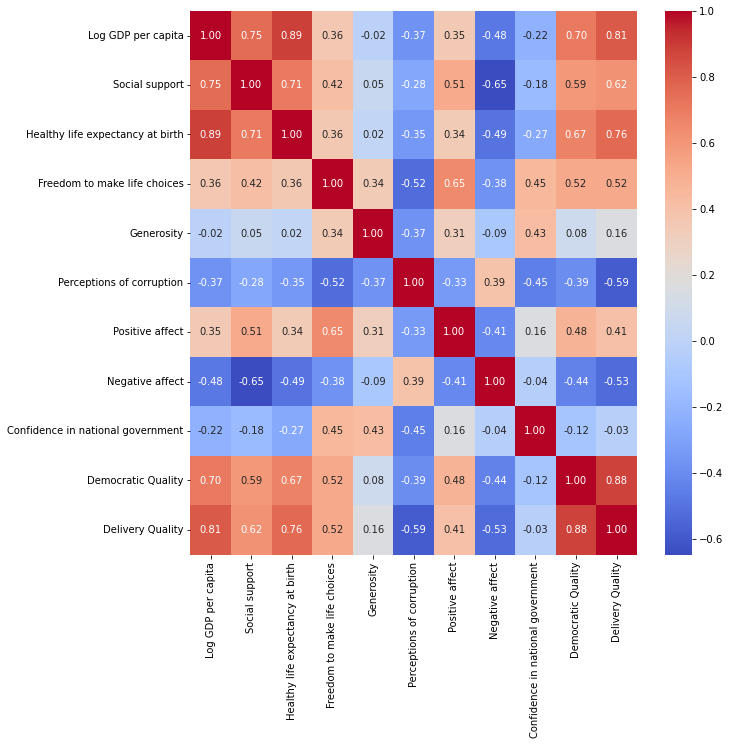

In [ ]:
# [TODO] Plot the heatmap of correlations between different attributes in X

plt.figure(figsize = (10,10))

sns.heatmap(X.corr(), cmap = 'coolwarm', annot=True, fmt='.2f')

# Logistic Regression

Let us now use the same dataset but convert our class label into a binary category based on terciles of the scores to apply logistic regression. 

In [ ]:
# Preparing data
X_whr['ladder_tercile'] = pd.qcut(X_whr['Life Ladder'], q = [0, 1/3, 2/3, 1], labels=[-1,0,1])
X_whr

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,ladder_tercile
0,3.621580,7.462587,0.526183,52.016528,0.446168,0.015139,0.876092,0.538285,0.352978,0.282242,-1.881029,-1.362071,-1
1,4.585767,9.338175,0.638489,68.871808,0.727760,-0.048433,0.887333,0.677618,0.335339,0.455209,0.230042,-0.145853,-1
3,6.387894,9.841995,0.905337,67.398514,0.853631,-0.184188,0.847628,0.836625,0.302906,0.367720,0.297319,-0.407026,1
4,4.320509,9.018934,0.709898,64.962730,0.591904,-0.160662,0.895856,0.604252,0.437441,0.200847,-0.501688,-0.176710,-1
5,7.272059,10.700423,0.948051,72.650340,0.918246,0.280585,0.388815,0.786999,0.223695,0.461565,1.126228,1.758197,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,6.095450,8.705671,0.951819,63.031545,0.982973,0.228788,0.467779,0.840215,0.151043,0.972227,-1.139873,-1.154118,1
147,4.804958,9.594635,0.906518,64.674961,0.484880,-0.192932,0.851611,0.777805,0.307195,0.188339,-1.057277,-1.673733,0
149,3.353955,7.815218,0.744548,54.796664,0.579379,-0.151297,0.829098,0.477321,0.281448,0.259555,-2.162281,-1.508283,-1
150,4.374495,8.203179,0.734095,53.267152,0.797799,0.064372,0.793735,0.701779,0.380387,0.681666,-0.008876,-0.425757,-1


In [ ]:
# [TODO] Get rows that are in top and bottom terciles of life ladder scores
X_tercile = X_whr.loc[(X_whr.ladder_tercile == 1) | (X_whr.ladder_tercile == -1)]
y_hpi = X_tercile[['ladder_tercile']]
X = X_tercile.drop(['Life Ladder', 'ladder_tercile'], axis = 1)
X

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,7.462587,0.526183,52.016528,0.446168,0.015139,0.876092,0.538285,0.352978,0.282242,-1.881029,-1.362071
1,9.338175,0.638489,68.871808,0.727760,-0.048433,0.887333,0.677618,0.335339,0.455209,0.230042,-0.145853
3,9.841995,0.905337,67.398514,0.853631,-0.184188,0.847628,0.836625,0.302906,0.367720,0.297319,-0.407026
4,9.018934,0.709898,64.962730,0.591904,-0.160662,0.895856,0.604252,0.437441,0.200847,-0.501688,-0.176710
5,10.700423,0.948051,72.650340,0.918246,0.280585,0.388815,0.786999,0.223695,0.461565,1.126228,1.758197
...,...,...,...,...,...,...,...,...,...,...,...
145,9.906209,0.901892,68.248306,0.900368,-0.079033,0.658757,0.856690,0.287681,0.462241,1.107030,0.746663
146,8.705671,0.951819,63.031545,0.982973,0.228788,0.467779,0.840215,0.151043,0.972227,-1.139873,-1.154118
149,7.815218,0.744548,54.796664,0.579379,-0.151297,0.829098,0.477321,0.281448,0.259555,-2.162281,-1.508283
150,8.203179,0.734095,53.267152,0.797799,0.064372,0.793735,0.701779,0.380387,0.681666,-0.008876,-0.425757


In [ ]:
# Prepare the feature and outcome variables
y_hpi = X_tercile[['ladder_tercile']]
X = X_tercile.drop(['Life Ladder','ladder_tercile'], axis=1)

X


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,7.462587,0.526183,52.016528,0.446168,0.015139,0.876092,0.538285,0.352978,0.282242,-1.881029,-1.362071
1,9.338175,0.638489,68.871808,0.727760,-0.048433,0.887333,0.677618,0.335339,0.455209,0.230042,-0.145853
3,9.841995,0.905337,67.398514,0.853631,-0.184188,0.847628,0.836625,0.302906,0.367720,0.297319,-0.407026
4,9.018934,0.709898,64.962730,0.591904,-0.160662,0.895856,0.604252,0.437441,0.200847,-0.501688,-0.176710
5,10.700423,0.948051,72.650340,0.918246,0.280585,0.388815,0.786999,0.223695,0.461565,1.126228,1.758197
...,...,...,...,...,...,...,...,...,...,...,...
145,9.906209,0.901892,68.248306,0.900368,-0.079033,0.658757,0.856690,0.287681,0.462241,1.107030,0.746663
146,8.705671,0.951819,63.031545,0.982973,0.228788,0.467779,0.840215,0.151043,0.972227,-1.139873,-1.154118
149,7.815218,0.744548,54.796664,0.579379,-0.151297,0.829098,0.477321,0.281448,0.259555,-2.162281,-1.508283
150,8.203179,0.734095,53.267152,0.797799,0.064372,0.793735,0.701779,0.380387,0.681666,-0.008876,-0.425757


In [ ]:
# Scale and divide into training and test data
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_hpi, test_size=0.50, random_state = 5)


In [ ]:
# Compare the performance of using different penalties
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# building regression models
clf_lr = LogisticRegression(penalty='none',solver='saga').fit(X_train, y_train)
clf_lasso = LogisticRegression(penalty='l1',solver='saga').fit(X_train, y_train)
clf_ridge = LogisticRegression(penalty='l2',solver='saga').fit(X_train, y_train)
clf_elastic = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=.5).fit(X_train, y_train)

# storing predicted values
predictions_lr = clf_lr.predict(X_test)
predictions_lasso = clf_lasso.predict(X_test)
predictions_ridge = clf_ridge.predict(X_test)
predictions_elastic = clf_elastic.predict(X_test)

# Measuring the accuracy of our model
print("No Reg.: ", 'Accuracy: ', accuracy_score(predictions_lr, y_test), ' Recall: ', format(recall_score(predictions_lr, y_test), '.2f'), ' Precision: ', format(precision_score(predictions_lr, y_test),'.2f'), 'AUC: ', format(roc_auc_score(predictions_lr, y_test),'.2f'))
print("Lasso: ", 'Accuracy: ', accuracy_score(predictions_lasso, y_test), ' Recall: ', format(recall_score(predictions_lasso, y_test),'.2f'), ' Precision: ', format(precision_score(predictions_lasso, y_test),'.2f'), 'AUC: ', roc_auc_score(predictions_lasso, y_test))
print("Ridge: ", 'Accuracy: ', accuracy_score(predictions_ridge, y_test), ' Recall: ', format(recall_score(predictions_ridge, y_test),'.2f'), ' Precision: ', format(precision_score(predictions_ridge, y_test),'.2f'), 'AUC: ', format(roc_auc_score(predictions_ridge, y_test),'.2f'))
print("Elastic Net: ", 'Accuracy: ', accuracy_score(predictions_elastic, y_test), ' Recall: ', format(recall_score(predictions_elastic, y_test),'.2f'), ' Precision: ', format(precision_score(predictions_elastic, y_test),'.2f'), 'AUC: ', format(roc_auc_score(predictions_elastic, y_test),'.2f'))

No Reg.:  Accuracy:  0.9318181818181818  Recall:  1.00  Precision:  0.88 AUC:  0.93
Lasso:  Accuracy:  1.0  Recall:  1.00  Precision:  1.00 AUC:  1.0
Ridge:  Accuracy:  0.9545454545454546  Recall:  1.00  Precision:  0.92 AUC:  0.95
Elastic Net:  Accuracy:  1.0  Recall:  1.00  Precision:  1.00 AUC:  1.00


Fine, and then if you use lasso, which is the L1, I think it's 100% reg 95% and elastic net which is a communist lasso and reg, it's 100%, right? So again, it's sort of interesting that having an and isn't always beneficial, right? So there's a lot of parameter tuning that needs to go in, which we'll look at in the next week. Note that all of this is using default parameters.

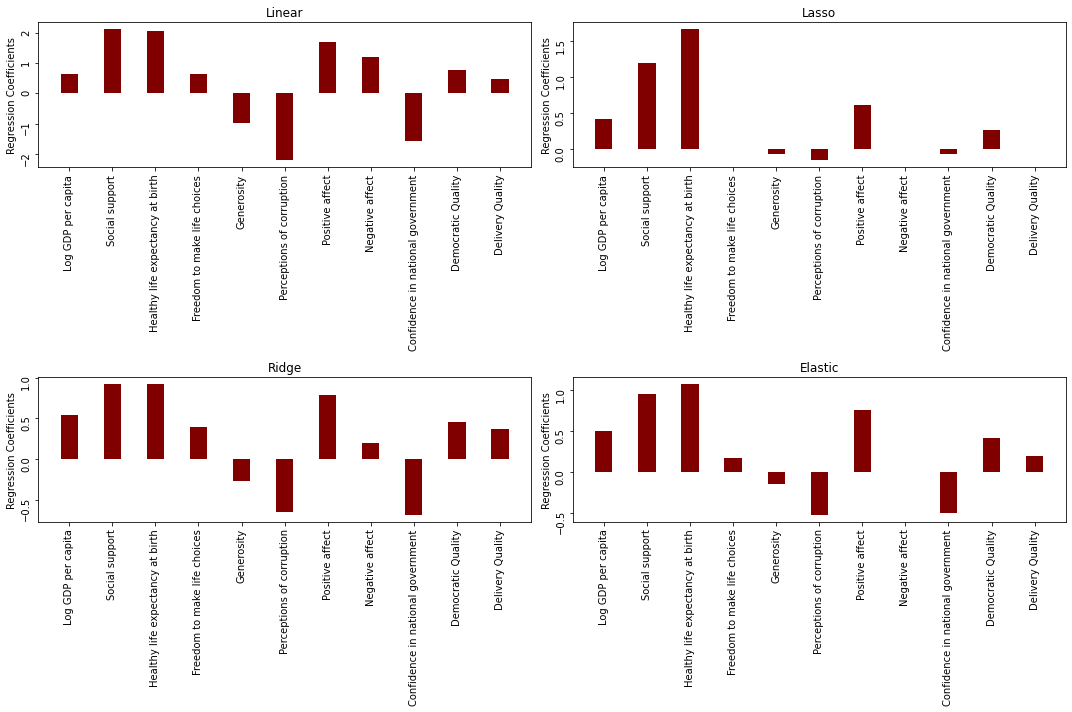

In [ ]:
# plotting regression coefficients for each model

fig, axs = plt.subplots(2, 2, figsize=(15,10))
#fig.suptitle('Regression coefficients for all regression models')

axs[0,0].bar(np.array(X_test.columns), np.array(clf_lr.coef_[0]), color ='maroon', width = 0.4)
#axs[0,0].set_xlabel("Features")
axs[0,0].set_ylabel("Regression Coefficients")
axs[0,0].title.set_text("Linear")
axs[0,0].tick_params(labelrotation=90)

axs[0,1].bar(np.array(X_test.columns), np.array(clf_lasso.coef_[0]), color ='maroon', width = 0.4)
#axs[0,1].set_xlabel("Features")
axs[0,1].set_ylabel("Regression Coefficients")
axs[0,1].title.set_text("Lasso")
axs[0,1].tick_params(labelrotation=90)

axs[1,0].bar(np.array(X_test.columns), np.array(clf_ridge.coef_[0]), color ='maroon', width = 0.4)
#axs[1,0].set_xlabel("Features")
axs[1,0].set_ylabel("Regression Coefficients")
axs[1,0].title.set_text("Ridge")
axs[1,0].tick_params(labelrotation=90)

axs[1,1].bar(np.array(X_test.columns), np.array(clf_elastic.coef_[0]), color ='maroon', width = 0.4)
#axs[1,1].set_xlabel("Features")
axs[1,1].set_ylabel("Regression Coefficients")
axs[1,1].title.set_text("Elastic")
axs[1,1].tick_params(labelrotation=90)

fig.tight_layout()
plt.show()

What can we infer from these coeffiicents? And are they different from linear regression coefficients?



Here are a couple of resources that illustrate: 

decision trees: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/ 

and

gradient descent in logistic regression: https://towardsdatascience.com/animations-of-logistic-regression-with-python-31f8c9cb420 
